#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [3]:
# Reading the data using pandas
df = pd.read_csv('mnist_test.csv')

# print first five rows of df
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Drop the label feature and
# store the pixel data in d.
df1 = df.drop('label',axis=1)
df1

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3  :
## Standardize the data

In [5]:
# Data-preprocessing: Standardizing the data

df_scaler = StandardScaler().fit_transform(df1)
df_scaler.shape

(10000, 784)

# Step 4 :  Reduce the columns data to 2 dimensions




In [6]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
df_1000 = df_scaler[:1000,:]

df_1000.shape

(1000, 784)

In [7]:
# Assuming 'label' column exists in the original dataframe 'df'
label = df['label']
labels_1000 = label[0:1000]
# Extract labels from the original dataframe


# Step 5 :
## define the model

In [8]:
tsne = TSNE(n_components = 2, perplexity = 30 , random_state = 0)

# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


# Step 6 :
## Fit the model

In [10]:
tsne_data = tsne.fit_transform(df_1000)
# creating a new data frame which
data = np.vstack((tsne_data.T,labels_1000)).T
# help us in plotting the result data
tsne_df = pd.DataFrame(data=data, columns=('D1','D2','label'))




# Step 7 :
##  Plotting the result

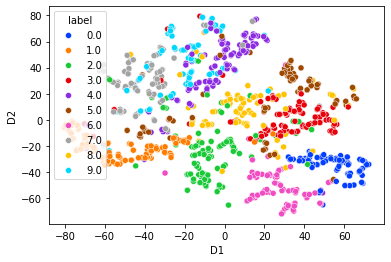

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the result of tsne
# perplexity = 5
sns.scatterplot(data=tsne_df, x='D1', y='D2',
               hue='label', palette="bright")
plt.show()

#There is a big distance between the points of the same cluster

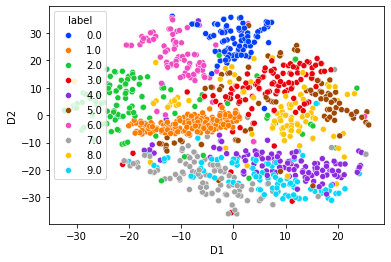

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the result of tsne
# perplexity = 50
sns.scatterplot(data=tsne_df, x='D1', y='D2',
               hue='label', palette="bright")
plt.show()

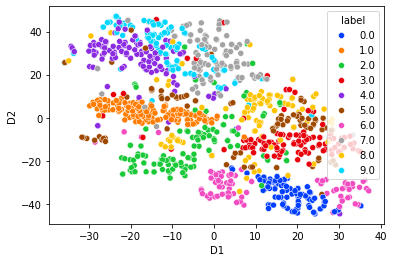

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the result of tsne
# perplexity = 30
sns.scatterplot(data=tsne_df, x='D1', y='D2',
               hue='label', palette="bright")
plt.show()

#**Well Done**